# Analytics based on Skills from Indeed.ca

### Install and import libraries

In [ ]:
!pip install bs4

In [27]:
import matplotlib as plt
import pandas as pd
import numpy as np
import bs4
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

### Define job title and geographic location

Search Indeed.ca web-site for "Data Scientist" job vacancies at the specified geographic location.

In [2]:
#jobtitle = str(input("Please enter the job title: "))
jobtitle = 'data scientist'
#location = str(input("Please enter the job location:"))
location = 'Toronto'
query1=jobtitle.replace(' ','+')
query2=location.replace(' ','+')
urlorig='https://www.indeed.ca/jobs?q='+query1+'&l='+query2+'&start='
urlorig

'https://www.indeed.ca/jobs?q=data+scientist&l=Toronto&start='

### Create list of job vacancies

Extract knowledge of technologies (Python, Excel, R, Matlab, Hadoop, Spark, etc.)

In [32]:
# Empty list for job_title, company_name, location, job_description, job skills
titles = []
company_names = []
location_names = []
job_descriptions = []
job_ids = []
skills = {}
skills['Python'] = []
skills['R '] = []
skills['Matlab'] = []
skills['Excel'] = []
skills['SAS'] = []
skills['SQL'] = []
skills['SPSS'] = []
skills['Hadoop'] = []
skills['Spark'] = []

# Loop over 1000 vacancies (20 at each page)
for i in range(0,1000,20):
    
    # html parsing Indeed job portal page 
    my_url = urlorig+str(i)
    uClient = uReq(my_url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html,'html.parser')
    
    # extract job_title
    jobs = page_soup.findAll("div", class_="row" )
    for job in jobs:
        try:
            titles.append(job.a["title"])
        except:
            titles.append("NA")
        
    # extract company_name
    companies = page_soup.findAll("span", class_="company" )
    for company in companies:
        try:
            company_names.append(company.text.strip())
        except:
            company_names.append("NA")
    
    # extract location       
    locations = page_soup.findAll( class_="location")
    for location in locations:
        try:
            location_names.append(location.text)
        except:
            location_names.append("NA")
    
    # extract job_description 
    links = page_soup.findAll("div", class_ = "row")   
    for link in links:
        
        Jb = uReq("https://www.indeed.ca" + link.a["href"])
        try:
            res_id = re.search('clk\?jk=(.*)&fccid', link.a["href"])
            job_ids.append(res_id.group(1))
        except:
            job_ids.append("")
        Jb_html = Jb.read()
        Jb.close()
        Jb_soup = soup(Jb_html, "html.parser")
        
        job_description = Jb_soup.findAll("div", class_= "jobsearch-JobComponent-description")
        cleantext = soup(str(job_description), 'lxml').text
        try:
            job_descriptions.append(cleantext)  
        except:
            job_descriptions.append("NA")  
            
        if("excel" in cleantext.lower()):
            skills['Excel'].append('1')
        else:
            skills['Excel'].append('0')
            
        if("python" in cleantext.lower()):
            skills['Python'].append('1')
        else:
            skills['Python'].append('0')
            
        if("R " in cleantext):
            skills['R '].append('1')
        else:
            skills['R '].append('0')
        
        if("matlab" in cleantext.lower()):
            skills['Matlab'].append('1')
        else:
            skills['Matlab'].append('0')
        
        if("sas" in cleantext.lower()):
            skills['SAS'].append('1')
        else:
            skills['SAS'].append('0')
            
        if("sql" in cleantext.lower()):
            skills['SQL'].append('1')
        else:
            skills['SQL'].append('0')
            
        if("spss" in cleantext.lower()):
            skills['SPSS'].append('1')
        else:
            skills['SPSS'].append('0')
            
        if("hadoop" in cleantext.lower()):
            skills['Hadoop'].append('1')
        else:
            skills['Hadoop'].append('0')
        
        if("spark" in cleantext.lower()):
            skills['Spark'].append('1')
        else:
            skills['Spark'].append('0')

### Create dataframe with job vacancies and save it to csv file

In [33]:
d = {'Job_ID':job_ids,'Job_Title':titles,'Company_Name':company_names,'Location':location_names,'Job_Description':job_descriptions}
df1 = pd.DataFrame(d)
df2 = pd.DataFrame(skills)
frames = [df1, df2]
results = pd.concat(frames, axis = 1)
results.head()

,Company_Name,Job_Description,Job_ID,Job_Title,Location,Excel,Hadoop,Matlab,Python,R,SAS,SPSS,SQL,Spark
0,Aimia,[The opportunity\n\nThe Data Scientist is resp...,,Data Scientist,"Toronto, ON",0,0,0,1,0,0,0,1,0
1,Indeed Prime,[],,Data Scientist,"Toronto, ON",0,0,0,0,0,0,0,0,0
2,Loblaw Digital,[Loblaw Digital is the team responsible for bu...,,Data Scientist,"Toronto, ON",0,1,0,1,0,0,0,1,0
3,Intact,[How do you imagine life at an insurance compa...,,Data Scientist - Machine Learning,"Toronto, ON",1,1,0,1,1,0,0,0,0
4,BMO Financial Group,[We are looking for a talented individual to j...,7dc582035711b632,Data Scientist/Analyst,"Toronto, ON",0,0,0,0,0,1,0,1,0


In [34]:
results.tail()

,Company_Name,Job_Description,Job_ID,Job_Title,Location,Excel,Hadoop,Matlab,Python,R,SAS,SPSS,SQL,Spark
997,ROSS Recruitment,[ContractOur client is a premier brand in medi...,67f4ffe25243202a,C# WPF Software Dev Contract 1000 Referral Fee,"Concord, ON",0,0,0,0,0,0,0,0,0
998,ADP,[Senior Java API Application Developer - ( Bac...,60e6097a5cc3316e,Senior Java API Application Developer - ( Back...,"Mississauga, ON",1,0,0,0,0,1,0,1,0
999,Aviva,"[At Aviva, we are on a mission to rethink how ...",f7cf69293b76e27d,"Senior Actuarial Manager, Personal Insurance M...","Markham, ON",1,0,0,1,0,0,0,0,0
1000,Sunnybrook Health Sciences Centre,[CLASSIFICATION: SRI - grant funded (1 year re...,61a3242263a24742,Postdoctoral research fellow - MRI Physics,"Toronto, ON",1,0,0,0,1,0,0,0,0
1001,"Premium Retail Services, Inc.",[POSITION OPEN: Samsung Analytics Manager (Can...,aafe7b55dc0c84a9,Samsung Analytics Manager,"Mississauga, ON",1,0,0,0,1,1,0,1,0


In [37]:
results.to_csv('Indeed_job_vacancies.csv')

### Plot percent of vacancies requiring knowledge of technology stacks

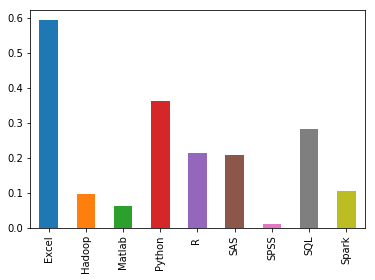

In [36]:
%matplotlib inline
df2.apply(pd.to_numeric).mean().plot(kind='bar')

### Some ideas for your project

Improve parsing of Indeed job vacancies.

Extract other features/skills from Indeed job postings, e.g.:
* business skills such as "consulting", "project management", etc.
* technical skills such as "databases", "Big Data", "Artificial Intelligence", "deep learning", etc.
* personal skills, team skills, presentation skills, etc.

Plot and visualize all your results and ideas.

Design a curriculumn based on the skills that you extracted from the job postings.